In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
rainfall_data = pd.read_csv('rainfall in india 1901-2015.csv')
rainfall_data

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0     365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1     228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2     728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3     502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4     368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   
...     ...    ...    ...    ...    ...    ...     ...      ...      ...   
4111  350.2  254.0  255.2  117.4  184.3   14.9  1533.7      7.9    196.2   
4112  231.5  381.2  179.8  145.9   12.4    8.8  1405.5     19.3     99.6   
4113  296.4  154.4  180.0   72.8   78.1   26.7  1426.3     60.6    131.1   
4114  116.1  466.1  132.2  169.2   59.0   62.3  1395.0     69.3     76.7   
4115  257.5  146.4  160.4  165.4  231.0  159.0  1642.9      2.7    223.9   

      Jun-Sep  Oct-Dec  
0      1696.3    980.3  
1      2185.9    716.7  
2      1874.0    690.6  
3      1977.6    571.0  
4      1624.9    630.8  
...       ...      ...  
4111   1013.0    316.6  
4112   1119.5    167.1  
4113   1057.0    177.6  
4114    958.5    290.5  
4115    860.9    555.4  

[4116 rows x 19 columns]

In [14]:
rainfall_data['JAN'].fillna(13.3,inplace=True)
rainfall_data['FEB'].fillna(14.5,inplace=True)
rainfall_data['MAR'].fillna(12.4,inplace=True)
rainfall_data['APR'].fillna(16.8,inplace=True)
rainfall_data['MAY'].fillna(14.9,inplace=True)
rainfall_data['JUN'].fillna(67.9,inplace=True)
rainfall_data['JUL'].fillna(77.1,inplace=True)
rainfall_data['JUL'].fillna(90.2,inplace=True)
rainfall_data['AUG'].fillna(22.6,inplace=True)
rainfall_data['SEP'].fillna(89.1,inplace=True)
rainfall_data['OCT'].fillna(34.5,inplace=True)
rainfall_data['NOV'].fillna(11.6,inplace=True)
rainfall_data['DEC'].fillna(6.5,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_16824\1448869579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rainfall_data['JAN'].fillna(13.3,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_16824\1448869579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [20]:
rainfall_data['ANNUAL'] = rainfall_data['ANNUAL'].fillna( rainfall_data[['JAN','FEB','MAR','APR','MAY','JUN',
                'JUL','AUG','SEP','OCT','NOV','DEC']].sum(axis=1)
)

In [22]:
rainfall_data['Jan-Feb'] = rainfall_data['Jan-Feb'].fillna(rainfall_data[['JAN','FEB']].sum(axis=1))

In [23]:
rainfall_data['Mar-May'] = rainfall_data['Mar-May'].fillna(rainfall_data[['MAR','APR','MAY']].sum(axis=1))

In [27]:
rainfall_data['Jun-Sep'] = rainfall_data['Jun-Sep'].fillna(rainfall_data[['JUN','JUL','AUG','SEP']].sum(axis=1))

In [28]:
rainfall_data['Oct-Dec'] = rainfall_data['Oct-Dec'].fillna(rainfall_data[['OCT','NOV','DEC']].sum(axis=1))

In [29]:
print(rainfall_data.isnull().sum().astype(int))

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
Jun-Sep+       0
dtype: int64


In [31]:
india_rainfall_data = rainfall_data.sort_values(by="YEAR", ascending=True).reset_index(drop=True)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [32]:
india_rainfall_data

SUBDIVISION  YEAR    JAN    FEB    MAR    APR  \
0                            LAKSHADWEEP  1901   22.6   86.4  114.8  263.8   
1                                 KERALA  1901   28.7   44.7   51.6  160.0   
2                   GANGETIC WEST BENGAL  1901   37.1   58.4    3.9   64.1   
3                                 ORISSA  1901   39.5   65.1   16.1   51.6   
4                     EAST UTTAR PRADESH  1901   62.6   31.3    8.2    1.1   
5                              JHARKHAND  1901   92.7   66.6   11.1   18.4   
6                                  BIHAR  1901   51.8   19.6   11.9    1.1   
7                     WEST UTTAR PRADESH  1901   51.4   25.6    9.5    0.7   
8                            UTTARAKHAND  1901  134.5   81.4   44.5    5.9   
9     SUB HIMALAYAN WEST BENGAL & SIKKIM  1901   26.5   14.8   14.1   29.2   
10              SOUTH INTERIOR KARNATAKA  1901    4.9   31.8    3.0   32.7   
11                       JAMMU & KASHMIR  1901   66.4   69.3   69.6  132.2   
12                      HIMACHAL PRADESH  1901  137.8  174.5   75.0   19.2   
13            HARYANA DELHI & CHANDIGARH  1901   35.4   28.9   11.1    0.0   
14                                PUNJAB  1901   55.7   50.1   25.2    2.1   
15              NORTH INTERIOR KARNATAKA  1901    3.5   18.8    7.1   67.2   
16                     COASTAL KARNATAKA  1901    1.8    0.6   10.7   52.4   
17                        EAST RAJASTHAN  1901   21.6    8.9    2.9    0.7   
18                        WEST RAJASTHAN  1901    6.7    0.0    1.1    0.0   
19                   WEST MADHYA PRADESH  1901   25.8    5.8    5.8    2.8   
20                   EAST MADHYA PRADESH  1901   48.5   38.1   15.7   10.7   
21                NAGA MANI MIZO TRIPURA  1901   11.7   18.1   29.4  206.2   
22                COASTAL ANDHRA PRADESH  1901   18.8   80.9    7.2   28.7   
23                          CHHATTISGARH  1901   48.9  116.5   27.8    5.5   
24                    MADHYA MAHARASHTRA  1901   18.8    0.6    7.7   36.6   
25                            TAMIL NADU  1901   24.5   39.1   21.7   36.0   
26                     ASSAM & MEGHALAYA  1901   27.1   19.5   30.6  223.0   
27                              VIDARBHA  1901   36.8   39.9   30.9   26.1   
28                          KONKAN & GOA  1901    5.6    0.1    0.4   35.7   
29                            MATATHWADA  1901   15.8    3.3   32.1   48.5   
30                    SAURASHTRA & KUTCH  1901    1.9    0.0    0.1    0.2   
31                        GUJARAT REGION  1901    4.2    0.0    0.6    1.6   
32                            RAYALSEEMA  1901    7.0   50.2    0.0   12.1   
33                             TELANGANA  1901    6.9   41.8    7.8   45.2   
34             ANDAMAN & NICOBAR ISLANDS  1901   49.2   87.1   29.2    2.3   
35                   WEST MADHYA PRADESH  1902   22.1    8.4    0.0    2.0   
36                   EAST MADHYA PRADESH  1902   14.9    8.9    0.0    3.6   
37                NAGA MANI MIZO TRIPURA  1902    4.8    0.5   36.3  297.8   
38                                PUNJAB  1902    0.0    0.8    9.9   10.9   
39              NORTH INTERIOR KARNATAKA  1902    0.0    0.0    0.3   22.5   
40                       JAMMU & KASHMIR  1902    6.5    9.7   91.3  100.5   
41                      HIMACHAL PRADESH  1902    6.5   27.0  104.4   76.2   
42                           UTTARAKHAND  1902    0.0   17.0   52.2   63.7   
43            HARYANA DELHI & CHANDIGARH  1902    0.0    0.7    2.9   10.2   
44                     ASSAM & MEGHALAYA  1902    9.3   10.2  105.6  350.0   
45                              VIDARBHA  1902    1.6    0.1    0.0    6.5   
46                          CHHATTISGARH  1902    0.6    6.5    0.4   13.9   
47                COASTAL ANDHRA PRADESH  1902    2.0    0.0    2.8   23.9   
48                    MADHYA MAHARASHTRA  1902    7.8    0.0    0.1    5.0   
49                            MATATHWADA  1902    1.3    0.0    0.4    7.2   
50                    SAURASHTRA & KUTCH  1902    0

In [40]:
#SubDivison Count
subdivison_count = india_rainfall_data.groupby('YEAR')['SUBDIVISION'].count().reset_index()

In [41]:
subdivison_count

YEAR  SUBDIVISION
0    1901           35
1    1902           35
2    1903           35
3    1904           35
4    1905           35
5    1906           35
6    1907           35
7    1908           35
8    1909           34
9    1910           35
10   1911           35
11   1912           35
12   1913           35
13   1914           35
14   1915           35
15   1916           36
16   1917           36
17   1918           35
18   1919           36
19   1920           36
20   1921           36
21   1922           36
22   1923           36
23   1924           36
24   1925           36
25   1926           36
26   1927           36
27   1928           36
28   1929           36
29   1930           36
30   1931           36
31   1932           36
32   1933           36
33   1934           36
34   1935           36
35   1936           36
36   1937           36
37   1938           36
38   1939           36
39   1940           36
40   1941           36
41   1942           36
42   1943           35
43   1944           35
44   1945           35
45   1946           36
46   1947           36
47   1948           35
48   1949           36
49   1950           36
50   1951           36
51   1952           36
52   1953           36
53   1954           35
54   1955           35
55   1956           35
56   1957           36
57   1958           36
58   1959           36
59   1960           36
60   1961           36
61   1962           36
62   1963           36
63   1964           36
64   1965           36
65   1966           36
66   1967           36
67   1968           36
68   1969           36
69   1970           36
70   1971           36
71   1972           36
72   1973           36
73   1974           36
74   1975           36
75   1976           36
76   1977           36
77   1978           36
78   1979           36
79   1980           36
80   1981           36
81   1982           36
82   1983           36
83   1984           36
84   1985           36
85   1986           36
86   1987           36
87   1988           36
88   1989           36
89   1990           36
90   1991           36
91   1992           36
92   1993           36
93   1994           36
94   1995           36
95   1996           36
96   1997           36
97   1998           36
98   1999           36
99   2000           36
100  2001           36
101  2002           36
102  2003           36
103  2004           36
104  2005           36
105  2006           36
106  2007           36
107  2008           36
108  2009           36
109  2010           36
110  2011           36
111  2012           36
112  2013           36
113  2014           36
114  2015           36

In [42]:
#Annual Rain sum by Year 
annualrain_sum = india_rainfall_data.groupby('YEAR')['ANNUAL'].sum().reset_index()

In [43]:
annualrain_sum

YEAR   ANNUAL
0    1901  44947.5
1    1902  46805.6
2    1903  48994.5
3    1904  43287.0
4    1905  41516.2
5    1906  47180.2
6    1907  45443.9
7    1908  46453.7
8    1909  45677.8
9    1910  50265.1
10   1911  44096.9
11   1912  46771.8
12   1913  45008.6
13   1914  51352.2
14   1915  47181.7
15   1916  56547.8
16   1917  59135.3
17   1918  44223.5
18   1919  53781.7
19   1920  46549.1
20   1921  53317.8
21   1922  53951.3
22   1923  51287.0
23   1924  54872.7
24   1925  51823.1
25   1926  53174.3
26   1927  52933.0
27   1928  52175.2
28   1929  52146.5
29   1930  50922.2
30   1931  56310.7
31   1932  51303.7
32   1933  60003.0
33   1934  52131.2
34   1935  49075.5
35   1936  56302.6
36   1937  52675.6
37   1938  55991.4
38   1939  47938.3
39   1940  52238.5
40   1941  46743.4
41   1942  52639.6
42   1943  52356.2
43   1944  51214.6
44   1945  49532.5
45   1946  56047.0
46   1947  53254.0
47   1948  54236.0
48   1949  56005.6
49   1950  50489.4
50   1951  47334.9
51   1952  47677.3
52   1953  52268.2
53   1954  51397.2
54   1955  54724.4
55   1956  56449.4
56   1957  50218.5
57   1958  56184.1
58   1959  59336.3
59   1960  50899.1
60   1961  61815.6
61   1962  53199.2
62   1963  53152.4
63   1964  53791.2
64   1965  42796.2
65   1966  46223.1
66   1967  49215.7
67   1968  46980.1
68   1969  49414.7
69   1970  55112.2
70   1971  53177.2
71   1972  41273.6
72   1973  50610.0
73   1974  47361.5
74   1975  55811.8
75   1976  48421.3
76   1977  54270.8
77   1978  53601.2
78   1979  43830.3
79   1980  51730.1
80   1981  51531.4
81   1982  46445.4
82   1983  55844.7
83   1984  49830.5
84   1985  48582.3
85   1986  46180.3
86   1987  46388.0
87   1988  57796.9
88   1989  48520.7
89   1990  58114.6
90   1991  50407.9
91   1992  47706.7
92   1993  51514.3
93   1994  54246.3
94   1995  54038.2
95   1996  50407.0
96   1997  50982.3
97   1998  54964.0
98   1999  49968.8
99   2000  46974.6
100  2001  46897.3
101  2002  41357.9
102  2003  48760.7
103  2004  46753.2
104  2005  52431.5
105  2006  50646.2
106  2007  54506.4
107  2008  49226.2
108  2009  42540.7
109  2010  52855.0
110  2011  50146.4
111  2012  46656.0
112  2013  53106.2
113  2014  44796.1
114  2015  46101.0

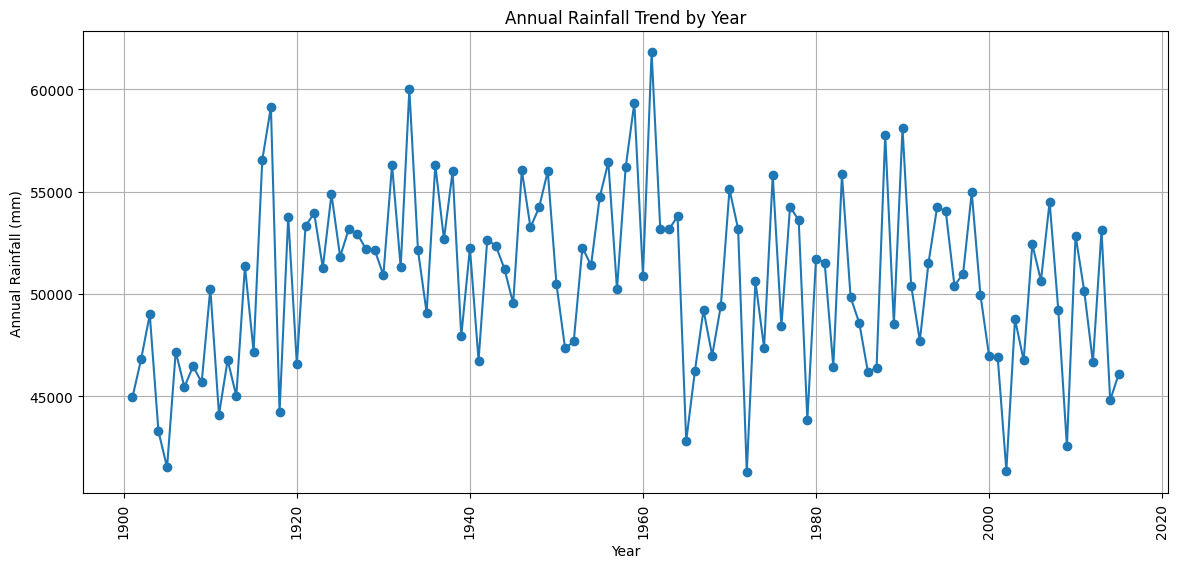

In [54]:
plt.figure(figsize=(14,6))
plt.plot(annualrain_sum['YEAR'], annualrain_sum['ANNUAL'], marker='o', linestyle='-')
plt.title("Annual Rainfall Trend by Year")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.grid(True)

plt.xticks(rotation=90)   # rotate labels vertically
plt.show()